Bayesian neural networks fitted with different varitional inference algorithms on a toy dataset

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from src.util import gen_toy_data
from src.variational_bnns import VariationalBNN
%matplotlib inline

In [ ]:
if not os.path.exists('Figures'):
    os.makedirs('Figures')

In [2]:
# Toy data
x_true = torch.tensor(np.linspace(-5,5,100).reshape(-1,1), dtype=torch.float)
x, x_val, y, y_val, y_scale, y_true = gen_toy_data(x_true=x_true)

In [3]:
def plot_varbnn(varbnn, n_samp, x_true, name, elbo_best):
    y_samps=np.array([varbnn.bnn(x_true, sample=True).view(-1).detach().numpy() for _ in range(n_samp)])
    sns.tsplot(y_samps, time=x_true.numpy(),ci='sd',color='red')
    plt.scatter(x.numpy(),y.numpy(), color='k', alpha=.5)
    plt.plot(x_true.numpy(),y_true.numpy(), color='k')
    plt.legend(['Truth','BNN'])
    plt.title('%s\n ELBO=%.3f' % (name, elbo_best))
    plt.xlabel('x')
    plt.ylabel('y')    

In [4]:
def run_toy(layer_type, n_restarts, n_epochs):
    elbo = np.zeros((n_epochs, n_restarts))

    for i in range(n_restarts):
        torch.manual_seed(i)
        varbnn = VariationalBNN(1,1,.01, layer_type=layer_type, activation_type='tanh', dim_hidden=100, n_layers=1, sigma_y=.1)
        elbo[:,i] = varbnn.train(x,y,n_epochs=n_epochs, print_freq=2000)

    # Find best model
    i_epoch_best, i_restart_best = np.unravel_index(elbo.argmax(), elbo.shape)
    elbo_best = elbo[i_epoch_best, i_restart_best]
    
    # Retrain best model
    torch.manual_seed(i_restart_best)
    varbnn = VariationalBNN(1,1,.01, layer_type=layer_type, activation_type='tanh', dim_hidden=100, n_layers=1, sigma_y=.1)
    varbnn.train(x,y,n_epochs=i_epoch_best, print_freq=2000)

    
    return varbnn, elbo, elbo_best


### Bayes by Backprop (BBB)

In [5]:
varbnn_bbb, elbo_bbb, elbo_best_bbb = run_toy(layer_type='bbb', n_restarts=5, n_epochs=10000)

Epoch[2000/10000], log_prob: -7.332620, kl: 5.323299, elbo: -12.655919
Epoch[4000/10000], log_prob: -7.010261, kl: 4.262611, elbo: -11.272873
Epoch[6000/10000], log_prob: -5.542830, kl: 4.187025, elbo: -9.729855
Epoch[8000/10000], log_prob: -5.797017, kl: 4.214222, elbo: -10.011239
Epoch[10000/10000], log_prob: -6.861998, kl: 4.236705, elbo: -11.098703
Epoch[2000/10000], log_prob: -6.177770, kl: 5.168636, elbo: -11.346405
Epoch[4000/10000], log_prob: -6.752090, kl: 4.205148, elbo: -10.957237
Epoch[6000/10000], log_prob: -6.393450, kl: 4.130554, elbo: -10.524004
Epoch[8000/10000], log_prob: -5.396180, kl: 4.191705, elbo: -9.587885
Epoch[10000/10000], log_prob: -5.955176, kl: 4.169355, elbo: -10.124531
Epoch[2000/10000], log_prob: -14.861500, kl: 4.280642, elbo: -19.142141
Epoch[4000/10000], log_prob: -13.991082, kl: 3.281126, elbo: -17.272209
Epoch[6000/10000], log_prob: -12.629095, kl: 2.927580, elbo: -15.556675
Epoch[8000/10000], log_prob: -5.875166, kl: 4.317106, elbo: -10.192272
Epo

//anaconda/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


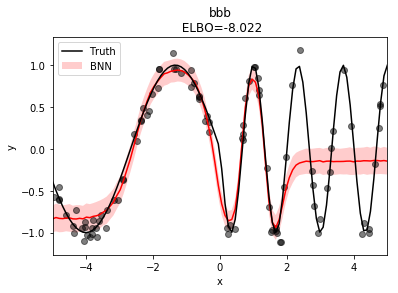

In [6]:
plot_varbnn(varbnn_bbb, 1000, x_true, "bbb", elbo_best_bbb)
plt.savefig('Figures/toy_bbb.pdf')

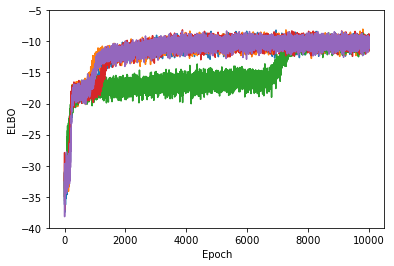

In [7]:
plt.plot(elbo_bbb)
plt.xlabel('Epoch')
plt.ylabel('ELBO')
plt.ylim(-40,-5)
plt.savefig('Figures/elbo_bbb.png')

### Matrix Variate Gaussian (MVG)

In [8]:
varbnn_mvg, elbo_mvg, elbo_best_mvg = run_toy(layer_type='mvg', n_restarts=5, n_epochs=10000)

Epoch[2000/10000], log_prob: -12.273791, kl: 6.243606, elbo: -18.517397
Epoch[4000/10000], log_prob: -13.529088, kl: 6.123679, elbo: -19.652767
Epoch[6000/10000], log_prob: -14.035559, kl: 6.179182, elbo: -20.214741
Epoch[8000/10000], log_prob: -14.954880, kl: 5.973784, elbo: -20.928665
Epoch[10000/10000], log_prob: -12.051057, kl: 6.104907, elbo: -18.155964
Epoch[2000/10000], log_prob: -12.308743, kl: 6.403021, elbo: -18.711765
Epoch[4000/10000], log_prob: -11.197281, kl: 6.261462, elbo: -17.458744
Epoch[6000/10000], log_prob: -9.156188, kl: 6.737197, elbo: -15.893385
Epoch[8000/10000], log_prob: -8.681362, kl: 6.694968, elbo: -15.376330
Epoch[10000/10000], log_prob: -7.154194, kl: 6.569090, elbo: -13.723285
Epoch[2000/10000], log_prob: -9.713015, kl: 6.956914, elbo: -16.669930
Epoch[4000/10000], log_prob: -6.101643, kl: 7.050385, elbo: -13.152029
Epoch[6000/10000], log_prob: -6.934807, kl: 6.942551, elbo: -13.877357
Epoch[8000/10000], log_prob: -8.423896, kl: 7.042326, elbo: -15.4662

//anaconda/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


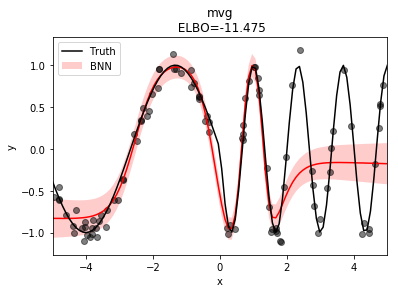

In [9]:
plot_varbnn(varbnn_mvg, 1000, x_true, "mvg", elbo_best_mvg)
plt.savefig('Figures/toy_mvg.pdf')

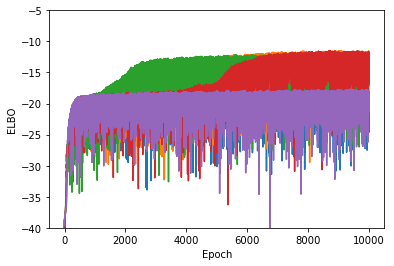

In [10]:
plt.plot(elbo_mvg)
plt.xlabel('Epoch')
plt.ylabel('ELBO')
plt.ylim(-40,-5)
plt.savefig('Figures/elbo_mvg.png')

### Multiplicative Normalizing Flows (MNF)

In [11]:
varbnn_mnf, elbo_mnf, elbo_best_mnf = run_toy(layer_type='mnf', n_restarts=5, n_epochs=10000)

Epoch[2000/10000], log_prob: -6.405908, kl: 4.906076, elbo: -11.311985
Epoch[4000/10000], log_prob: -5.488765, kl: 4.333117, elbo: -9.821882
Epoch[6000/10000], log_prob: -5.475839, kl: 4.365252, elbo: -9.841091
Epoch[8000/10000], log_prob: -6.351068, kl: 4.294706, elbo: -10.645774
Epoch[10000/10000], log_prob: -6.153471, kl: 4.541099, elbo: -10.694570
Epoch[2000/10000], log_prob: -7.396614, kl: 5.138672, elbo: -12.535286
Epoch[4000/10000], log_prob: -5.316376, kl: 4.525099, elbo: -9.841475
Epoch[6000/10000], log_prob: -5.238242, kl: 4.256010, elbo: -9.494251
Epoch[8000/10000], log_prob: -4.706798, kl: 4.359461, elbo: -9.066258
Epoch[10000/10000], log_prob: -5.193440, kl: 4.431180, elbo: -9.624620
Epoch[2000/10000], log_prob: -6.512932, kl: 5.456816, elbo: -11.969748
Epoch[4000/10000], log_prob: -5.169590, kl: 4.756919, elbo: -9.926509
Epoch[6000/10000], log_prob: -5.977328, kl: 4.641838, elbo: -10.619165
Epoch[8000/10000], log_prob: -5.155637, kl: 4.587066, elbo: -9.742702
Epoch[10000/

//anaconda/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


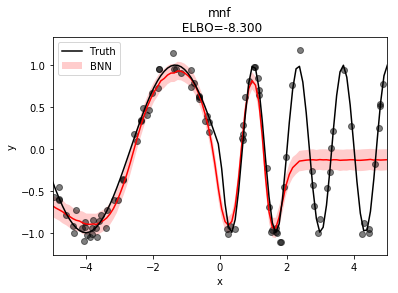

In [17]:
plot_varbnn(varbnn_mnf, 1000, x_true, "mnf", elbo_best_mnf)
plt.savefig('Figures/toy_mnf.pdf')

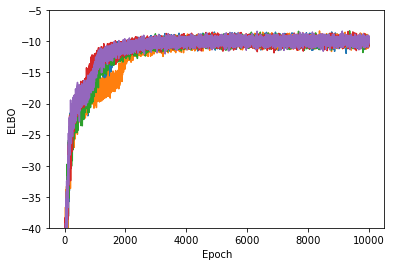

In [13]:
plt.plot(elbo_mnf)
plt.xlabel('Epoch')
plt.ylabel('ELBO')
plt.ylim(-40,-5)
plt.savefig('Figures/elbo_mnf.png')

### Bayes by Hypernet (BBH)
Not working, gradients not backproping through KL term.

In [14]:
varbnn_bbh, elbo_bbh, elbo_best_bbh = run_toy(layer_type='bbh', n_restarts=5, n_epochs=10000)

Epoch[2000/10000], log_prob: -4.202977, kl: 34.580536, elbo: -38.783512
Epoch[4000/10000], log_prob: 0.482446, kl: 35.766426, elbo: -35.283981
Epoch[6000/10000], log_prob: 0.897658, kl: 35.796261, elbo: -34.898602
Epoch[8000/10000], log_prob: 0.946115, kl: 35.783577, elbo: -34.837463
Epoch[10000/10000], log_prob: 0.945936, kl: 35.760437, elbo: -34.814503
Epoch[2000/10000], log_prob: -2.477219, kl: 34.939461, elbo: -37.416679
Epoch[4000/10000], log_prob: -1.152832, kl: 35.571117, elbo: -36.723949
Epoch[6000/10000], log_prob: 0.960592, kl: 35.933254, elbo: -34.972664
Epoch[8000/10000], log_prob: 0.934156, kl: 35.784748, elbo: -34.850594
Epoch[10000/10000], log_prob: 0.755448, kl: 35.788284, elbo: -35.032837
Epoch[2000/10000], log_prob: -5.181366, kl: 34.879601, elbo: -40.060966
Epoch[4000/10000], log_prob: 0.873937, kl: 35.991055, elbo: -35.117119
Epoch[6000/10000], log_prob: 0.886302, kl: 35.939270, elbo: -35.052967
Epoch[8000/10000], log_prob: 0.072751, kl: 35.888332, elbo: -35.815582


//anaconda/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


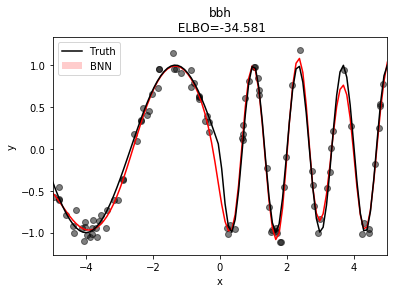

In [15]:
plot_varbnn(varbnn_bbh, 1000, x_true, "bbh", elbo_best_bbh)
plt.savefig('Figures/toy_bbh.pdf')

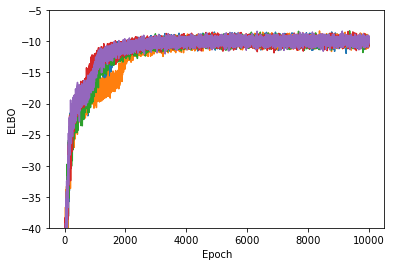

In [16]:
plt.plot(elbo_mnf)
plt.xlabel('Epoch')
plt.ylabel('ELBO')
plt.ylim(-40,-5)
plt.savefig('Figures/elbo_bbh.png')

//anaconda/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


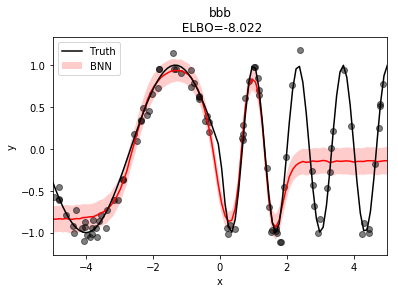

In [20]:
plot_varbnn(varbnn_bbb, 1000, x_true, "bbb", elbo_best_bbb)
plt.savefig('tt/toy_bbb.pdf')